#  Corona vaccine progress 
version 0.91 created by Magnus Sälgö [twitter](https://twitter.com/salgo60), [Linked in](https://www.linkedin.com/in/magnus-s%C3%A4lg%C3%B6-148890/)

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-01-09 02:06:29.850370


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountriesGitHub = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
GITHUB_location_csv = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv"  
countries_csv = pd.read_csv(GITHUB_location_csv)  


In [4]:
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Argentina,ARG,Sputnik V,2021-01-08,Government of Argentina,https://www.argentina.gob.ar/noticias/ya-se-ap...
1,Austria,AUT,Pfizer/BioNTech,2020-12-30,Ministry of Health,https://web.archive.org/web/20210104171732/htt...
2,Bahrain,BHR,Sinopharm,2021-01-08,Ministry of Health,https://twitter.com/MOH_Bahrain/status/1347636...
3,Belgium,BEL,Pfizer/BioNTech,2021-01-02,Government vaccination taskforce,https://www.lecho.be/dossiers/coronavirus/coro...
4,Bulgaria,BGR,Pfizer/BioNTech,2021-01-09,Ministry of Health,https://coronavirus.bg/bg/statistika
5,Canada,CAN,"Moderna, Pfizer/BioNTech",2021-01-07,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada
6,Chile,CHL,Pfizer/BioNTech,2021-01-06,Department of Statistics and Health Information,https://deis.minsal.cl/
7,China,CHN,"CNBG, Sinovac",2020-12-31,National Health Commission,https://www.globaltimes.cn/page/202012/1211515...
8,Costa Rica,CRI,Pfizer/BioNTech,2021-01-08,National Health Commission,https://www.larepublica.net/noticia/caja-repor...
9,Croatia,HRV,Pfizer/BioNTech,2021-01-08,Ministry of Health,https://vlada.gov.hr/vijesti/epidemioloske-mje...


## Latest reported

In [5]:
# merge allCountriesGitHub with all Countries_csv
allCountries = pd.merge(allCountriesGitHub,countries_csv,how='outer',on="location",indicator=True)
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:25]

,location,date,vaccine,total_vaccinations,source_url,iso_code,vaccines,last_observation_date,source_name,source_website,_merge
29,Bulgaria,2021-01-09,Pfizer/BioNTech,13355,https://coronavirus.bg/bg/statistika,BGR,Pfizer/BioNTech,2021-01-09,Ministry of Health,https://coronavirus.bg/bg/statistika,both
28,Bulgaria,2021-01-08,Pfizer/BioNTech,11117,https://coronavirus.bg/bg/statistika,BGR,Pfizer/BioNTech,2021-01-09,Ministry of Health,https://coronavirus.bg/bg/statistika,both
87,Denmark,2021-01-08,Pfizer/BioNTech,102092,https://files.ssi.dk/covid19/vaccinationstilsl...,DNK,Pfizer/BioNTech,2021-01-08,Statens Serum Institut,https://covid19.ssi.dk/overvagningsdata/vaccin...,both
21,Bahrain,2021-01-08,Sinopharm,78291,https://twitter.com/MOH_Bahrain/status/1347636...,BHR,Sinopharm,2021-01-08,Ministry of Health,https://twitter.com/MOH_Bahrain/status/1347636...,both
110,France,2021-01-08,Pfizer/BioNTech,80000,https://twitter.com/olivierveran/status/134761...,FRA,Pfizer/BioNTech,2021-01-08,Ministry of Health,https://twitter.com/olivierveran/status/134761...,both
71,Croatia,2021-01-08,Pfizer/BioNTech,24985,https://vlada.gov.hr/vijesti/epidemioloske-mje...,HRV,Pfizer/BioNTech,2021-01-08,Ministry of Health,https://vlada.gov.hr/vijesti/epidemioloske-mje...,both
235,Poland,2021-01-08,Pfizer/BioNTech,188956,https://twitter.com/MZ_GOV_PL/status/134748318...,POL,Pfizer/BioNTech,2021-01-08,Ministry of Health,https://twitter.com/MZ_GOV_PL/status/134748318...,both
134,Greece,2021-01-08,Pfizer/BioNTech,34787,https://www.data.gov.gr/datasets/mdg_emvolio/,GRC,Pfizer/BioNTech,2021-01-08,Ministry of Health,https://www.data.gov.gr/datasets/mdg_emvolio/,both
241,Portugal,2021-01-08,Pfizer/BioNTech,70000,https://www.sns.gov.pt/monitorizacao-do-sns/va...,PRT,Pfizer/BioNTech,2021-01-08,National Health Service,https://www.sns.gov.pt/monitorizacao-do-sns/va...,both
66,Costa Rica,2021-01-08,Pfizer/BioNTech,9751,https://www.larepublica.net/noticia/caja-repor...,CRI,Pfizer/BioNTech,2021-01-08,National Health Commission,https://www.larepublica.net/noticia/caja-repor...,both


In [6]:
#Countries in list
allCountries["location"].value_counts()

Canada                  25
Israel                  19
Bahrain                 17
Denmark                 13
Italy                   13
Romania                 12
Greece                  12
Germany                 12
United States           12
Estonia                 11
Poland                  10
Oman                    10
Norway                   9
Mexico                   9
Hungary                  9
Bulgaria                 7
Latvia                   7
Chile                    7
Portugal                 6
Croatia                  5
Slovenia                 5
Finland                  5
Argentina                4
Wales                    4
Scotland                 4
Northern Ireland         4
France                   4
Spain                    4
Russia                   3
England                  3
Netherlands              3
Ireland                  3
United Kingdom           3
Slovakia                 3
United Arab Emirates     3
Costa Rica               3
China                    2
C

In [7]:
allCountries.groupby(["location", "vaccine"]).size()

location              vaccine                 
Argentina             Sputnik V                    4
Austria               Pfizer/BioNTech              1
Bahrain               Sinopharm                   17
Belgium               Pfizer/BioNTech              1
Bulgaria              Pfizer/BioNTech              7
Canada                Moderna, Pfizer/BioNTech     8
                      Pfizer/BioNTech             17
Chile                 Pfizer/BioNTech              7
China                 CNBG, Sinovac                2
Costa Rica            Pfizer/BioNTech              3
Croatia               Pfizer/BioNTech              5
Cyprus                Pfizer/BioNTech              1
Czechia               Pfizer/BioNTech              2
Denmark               Pfizer/BioNTech             13
England               Pfizer/BioNTech              3
Estonia               Pfizer/BioNTech             11
Finland               Pfizer/BioNTech              5
France                Pfizer/BioNTech              4

In [8]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 292
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   location               282 non-null    object        
 1   date                   282 non-null    datetime64[ns]
 2   vaccine                282 non-null    object        
 3   total_vaccinations     282 non-null    int64         
 4   source_url             282 non-null    object        
 5   iso_code               282 non-null    object        
 6   vaccines               282 non-null    object        
 7   last_observation_date  282 non-null    object        
 8   source_name            282 non-null    object        
 9   source_website         282 non-null    object        
 10  _merge                 282 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1), object(8)
memory usage: 24.6+ KB


In [9]:
#Reported numbers are accumulated --> get latest
plotLatestCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine','iso_code']].groupby('location').apply(lambda x: x.head(1))
plotLatestCountries = plotLatestCountries.set_index('location')
worldtotal_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape)


18 644 096 (44, 3)


## Charts

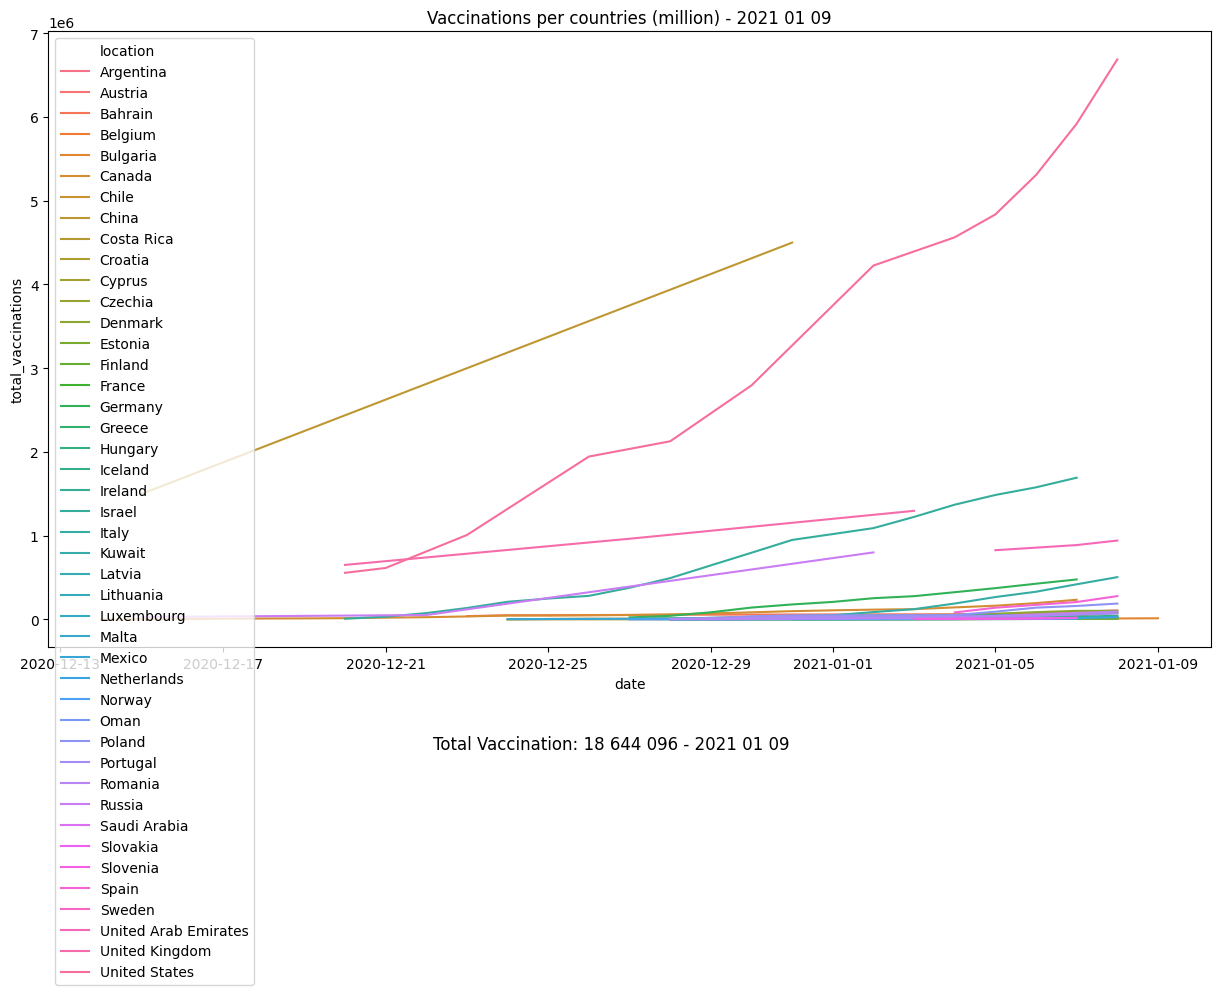

In [10]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="total_vaccinations", hue="location" )
plt.title("Vaccinations per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str  + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/Corona_Line.png',bbox_inches='tight')  
plt.show() 


In [11]:
allCountriesFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 292
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   location               282 non-null    object        
 1   date                   282 non-null    datetime64[ns]
 2   vaccine                282 non-null    object        
 3   total_vaccinations     282 non-null    int64         
 4   source_url             282 non-null    object        
 5   iso_code               282 non-null    object        
 6   vaccines               282 non-null    object        
 7   last_observation_date  282 non-null    object        
 8   source_name            282 non-null    object        
 9   source_website         282 non-null    object        
 10  _merge                 282 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1), object(8)
memory usage: 24.6+ KB


In [12]:
# Resample dates Forward filling and sum

#allCountriesFiltered
#grouper = allCountriesFiltered.groupby([pd.Grouper(key="date",freq='1D'), 'location']).mean() 


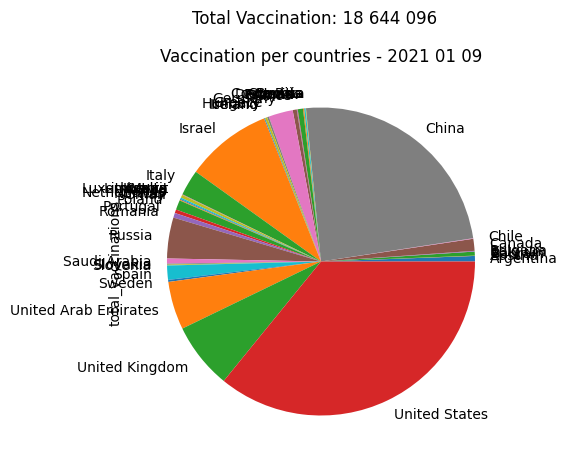

In [13]:
# Plot filtered
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [14]:
plotLatestCountries.sort_values(by='total_vaccinations',ascending=False)

,total_vaccinations,vaccine,iso_code
location,,,
United States,6688231,"Moderna, Pfizer/BioNTech",USA
China,4500000,"CNBG, Sinovac",CHN
Israel,1692000,Pfizer/BioNTech,ISR
United Kingdom,1296432,Pfizer/BioNTech,GBR
United Arab Emirates,941556,Sinopharm,ARE
Russia,800000,Sputnik V,RUS
Italy,504587,Pfizer/BioNTech,ITA
Germany,476959,Pfizer/BioNTech,DEU
Spain,277976,Pfizer/BioNTech,ESP


In [15]:
plotLatestCountries.shape

(44, 3)

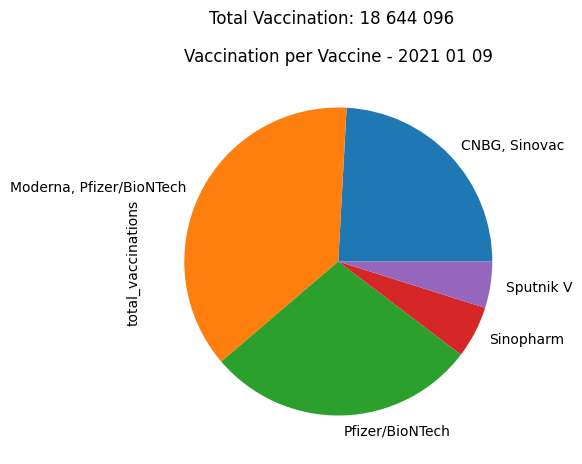

In [16]:
# Vaccine numbers
plotVaccine = plotLatestCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [17]:
plotVaccine.sort_values(ascending=True)

vaccine
Sputnik V                    907542
Sinopharm                   1019847
CNBG, Sinovac               4500000
Pfizer/BioNTech             5294080
Moderna, Pfizer/BioNTech    6922627
Name: total_vaccinations, dtype: int64

In [18]:
# Sweden have 10 000 doses....
#allCountries

In [19]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-09 02:06:35.490835
Time elapsed (hh:mm:ss.ms) 0:00:05.640616


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata


In [20]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sp8
# see also https://www.wikidata.org/wiki/Wikidata:Project_chat#Brexit_in_Wikidata
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita
?G20 ?IMF (sample(?genderH) AS ?genderH)
WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1 }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita }
  ?cid wdt:P6/wdt:P21 ?gHead # gender head of gov
  BIND (exists{?cid wdt:P463 wd:Q458} && not exists{?cid p:P463 [ ps:P463 wd:Q458 ; pq:P582 [] ]} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q19771} && not exists{?cid p:P463 [ ps:P463 wd:Q19771 ; pq:P582 [] ]} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q7804} && not exists{?cid p:P463 [ ps:P463 wd:Q7804 ; pq:P582 [] ]} AS ?IMF)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
    ?gHead rdfs:label ?genderH.
    FILTER((LANG(?genderH)) = "en")

  }
FILTER ( ?cid  not in ( wd:Q756617 ) ) #Danish Realm
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid 
 ?G20 ?IMF """


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cid                  194 non-null    object
 1   continent            194 non-null    object
 2   memberEU             194 non-null    object
 3   country              194 non-null    object
 4   qid                  194 non-null    object
 5   population           194 non-null    object
 6   ISO3166_1            194 non-null    object
 7   nominalGDPperCapita  191 non-null    object
 8   G20                  194 non-null    object
 9   IMF                  194 non-null    object
 10  genderH              194 non-null    object
dtypes: object(11)
memory usage: 16.8+ KB


In [21]:
WDpopulation.sample(5)

,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH
98,http://www.wikidata.org/entity/Q1008,Africa,false,Ivory Coast,Q1008,24294750,CIV,1398.99,false,false,male
117,http://www.wikidata.org/entity/Q833,Asia,false,Malaysia,Q833,31624264,MYS,9951,false,false,male
174,http://www.wikidata.org/entity/Q34,Europe,true,Sweden,Q34,10373225,SWE,53253,false,false,male
180,http://www.wikidata.org/entity/Q191,Europe,true,Estonia,Q191,1324820,EST,20200,false,false,male
179,http://www.wikidata.org/entity/Q235,Europe,false,Monaco,Q235,38695,MCO,168010,false,false,male


In [22]:
plotLatestCountries

,total_vaccinations,vaccine,iso_code
location,,,
Argentina,107542,Sputnik V,ARG
Austria,6000,Pfizer/BioNTech,AUT
Bahrain,78291,Sinopharm,BHR
Belgium,700,Pfizer/BioNTech,BEL
Bulgaria,13355,Pfizer/BioNTech,BGR
Canada,234396,"Moderna, Pfizer/BioNTech",CAN
Chile,10689,Pfizer/BioNTech,CHL
China,4500000,"CNBG, Sinovac",CHN
Costa Rica,9751,Pfizer/BioNTech,CRI


In [23]:
#plotCountriesPopulation = pd.merge(plotLatestCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
CountriesData = pd.merge(plotLatestCountries, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" ,indicator=True)   
CountriesData

,total_vaccinations,vaccine,iso_code,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH,_merge
0,107542,Sputnik V,ARG,http://www.wikidata.org/entity/Q414,South America,false,Argentina,Q414,44938712,ARG,14398,true,false,male,both
1,6000,Pfizer/BioNTech,AUT,http://www.wikidata.org/entity/Q40,Europe,true,Austria,Q40,8809212,AUT,44920,false,false,male,both
2,78291,Sinopharm,BHR,http://www.wikidata.org/entity/Q398,Asia,false,Bahrain,Q398,1492584,BHR,23739,false,false,male,both
3,700,Pfizer/BioNTech,BEL,http://www.wikidata.org/entity/Q31,Europe,true,Belgium,Q31,11431406,BEL,43467,false,false,male,both
4,13355,Pfizer/BioNTech,BGR,http://www.wikidata.org/entity/Q219,Europe,true,Bulgaria,Q219,7000039,BGR,8228,false,false,male,both
5,234396,"Moderna, Pfizer/BioNTech",CAN,http://www.wikidata.org/entity/Q16,North America,false,Canada,Q16,37894799,CAN,44870,true,false,male,both
6,10689,Pfizer/BioNTech,CHL,http://www.wikidata.org/entity/Q298,South America,false,Chile,Q298,18054726,CHL,15346,false,false,male,both
7,4500000,"CNBG, Sinovac",CHN,http://www.wikidata.org/entity/Q148,Asia,false,People's Republic of China,Q148,1409517397,CHN,8826,true,false,male,both
8,9751,Pfizer/BioNTech,CRI,http://www.wikidata.org/entity/Q800,North America,false,Costa Rica,Q800,4905769,CRI,11677,false,false,male,both
9,24985,Pfizer/BioNTech,HRV,http://www.wikidata.org/entity/Q224,Europe,true,Croatia,Q224,4105493,HRV,13386,false,false,male,both


In [24]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
# G20 IMF
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)
CountriesData['genderFlag'] = CountriesData['genderH']
CountriesData["genderFlag"].replace({"male": "1", "female": "0"}, inplace=True)
CountriesData['genderFlag'] = CountriesData['genderFlag'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   total_vaccinations   44 non-null     int64   
 1   vaccine              44 non-null     object  
 2   iso_code             44 non-null     object  
 3   cid                  44 non-null     object  
 4   continent            44 non-null     object  
 5   memberEU             44 non-null     int64   
 6   country              44 non-null     object  
 7   qid                  44 non-null     object  
 8   population           44 non-null     int64   
 9   ISO3166_1            44 non-null     object  
 10  nominalGDPperCapita  43 non-null     float64 
 11  G20                  44 non-null     int64   
 12  IMF                  44 non-null     int64   
 13  genderH              44 non-null     object  
 14  _merge               44 non-null     category
 15  genderFlag           44 n

In [25]:
#CountriesData

In [26]:
CountriesData['Country'] = CountriesData.index

In [27]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                          -0.362358
population                         0.685948
nominalGDPperCapita                0.095955
G20                                0.443711
IMF                               -0.007535
genderFlag                         0.105960
Country                            0.197024
vaccinations_population_percent    0.231268
Name: total_vaccinations, dtype: float64

In [28]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.231268
memberEU                          -0.322513
population                        -0.048829
nominalGDPperCapita                0.118895
G20                               -0.097585
IMF                               -0.050655
genderFlag                         0.063946
Country                            0.097369
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

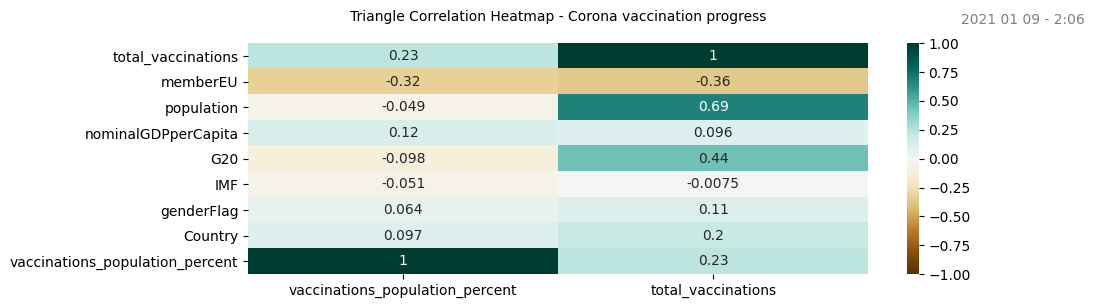

In [30]:
import numpy as np
plt.figure(figsize=(10, 3))
#np.triu(np.ones_like(correlations["total_vaccinations","vaccinations_population_percent"]))
#mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations[{"total_vaccinations","vaccinations_population_percent"}],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show() 


In [31]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G20","IMF","country"}]

,vaccinations_population_percent,IMF,total_vaccinations,population,memberEU,country,continent,G20
21,18.607720,0,1692000,9093000,0,Israel,Asia,0
41,10.016399,0,941556,9400145,0,United Arab Emirates,Asia,0
2,5.245333,0,78291,1492584,0,Bahrain,Asia,0
43,2.037607,0,6688231,328239523,0,United States of America,North America,1
42,1.963628,0,1296432,66022273,0,United Kingdom,Europe,1
12,1.751912,0,102092,5827463,1,Denmark,Europe,0
19,1.365355,0,4875,357050,0,Iceland,Europe,0
22,0.836559,1,504587,60317000,1,Italy,Europe,1
38,0.790515,0,16339,2066880,1,Slovenia,Europe,0
33,0.660377,0,70000,10600000,1,Portugal,Europe,0


## Vaccination numbers % of population

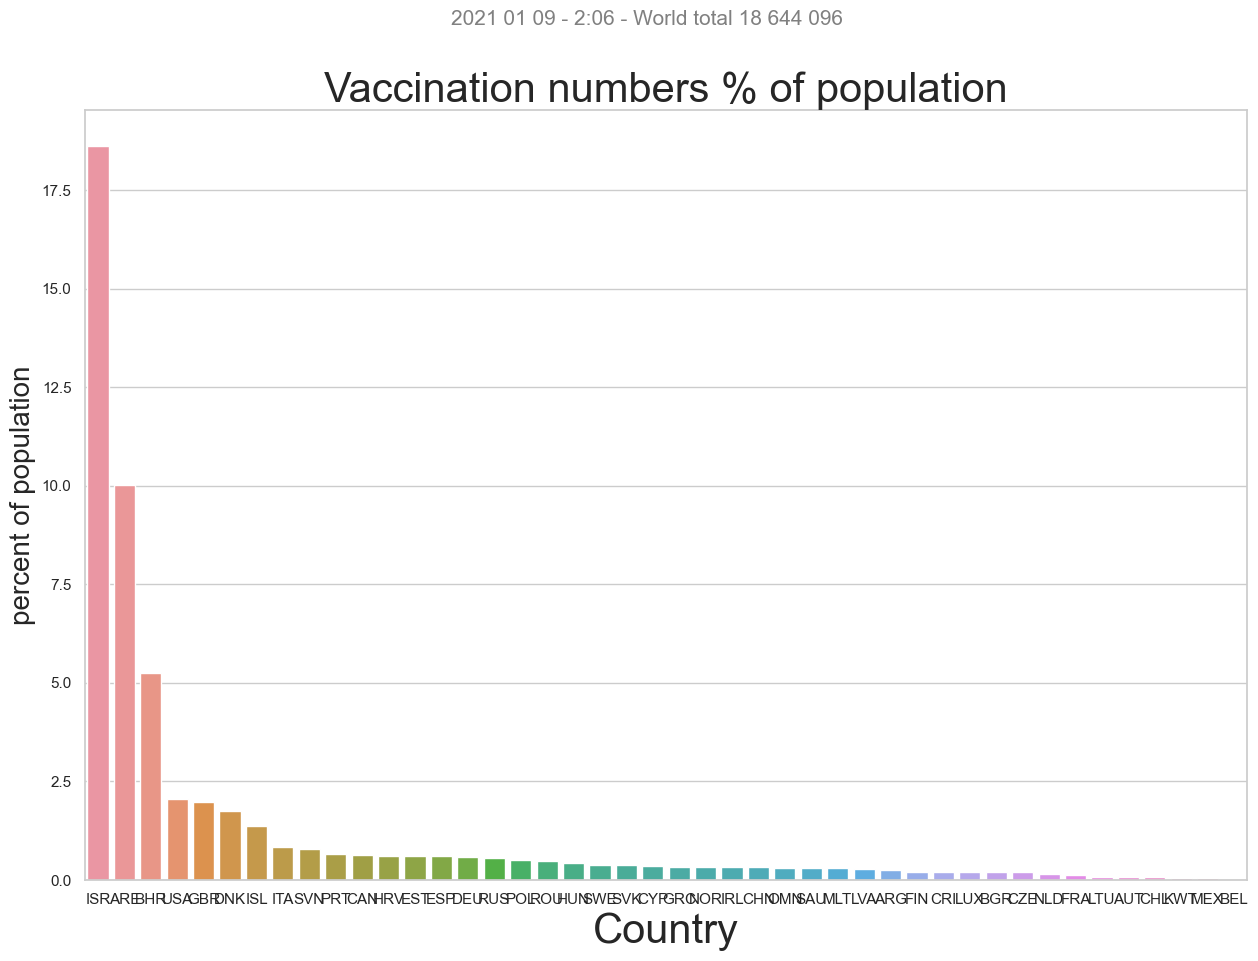

In [32]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")
plt.show() 

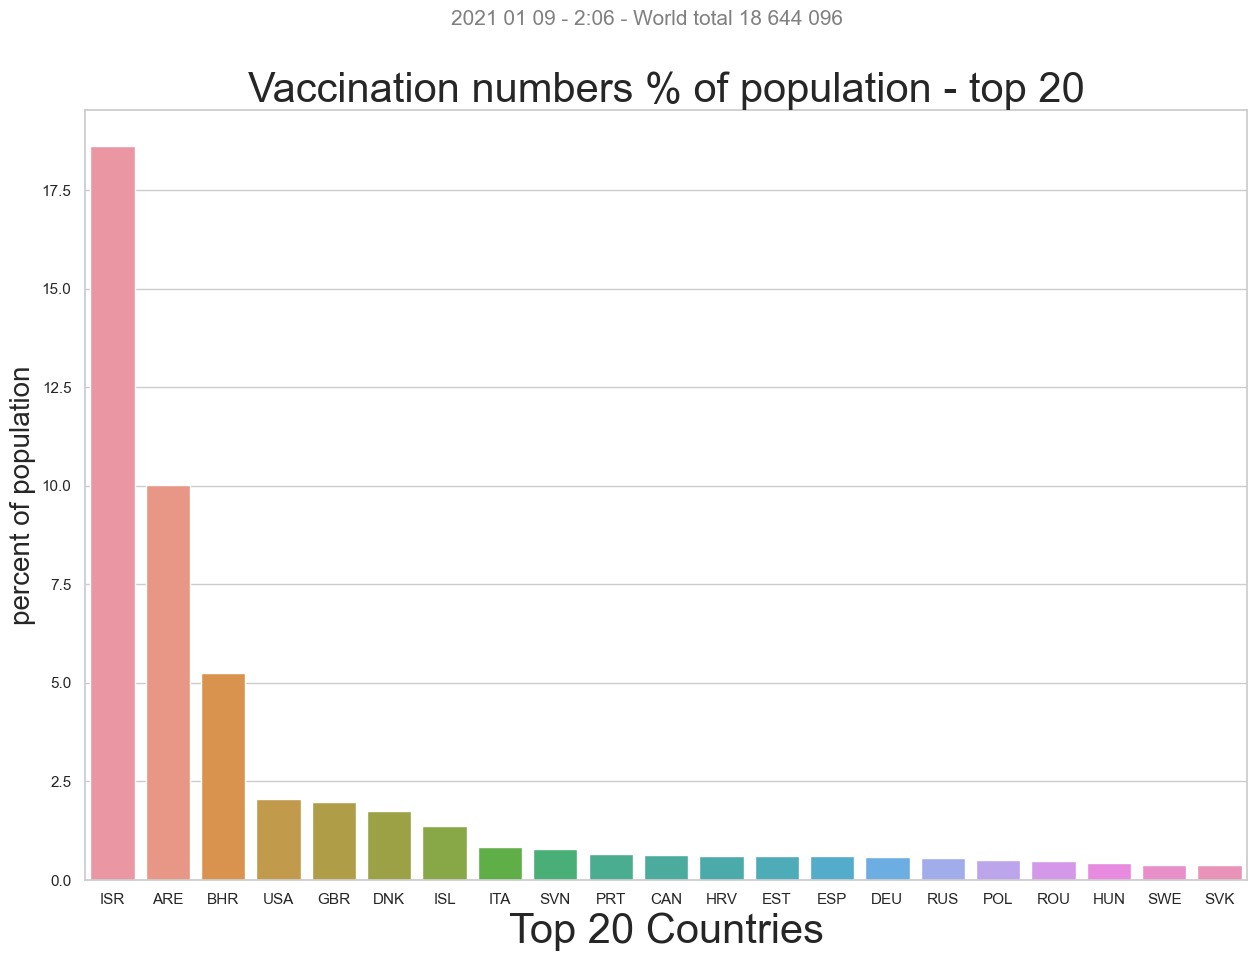

In [33]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:21]). \
            set_title("Vaccination numbers % of population - top 20", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 20 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")
plt.show() 

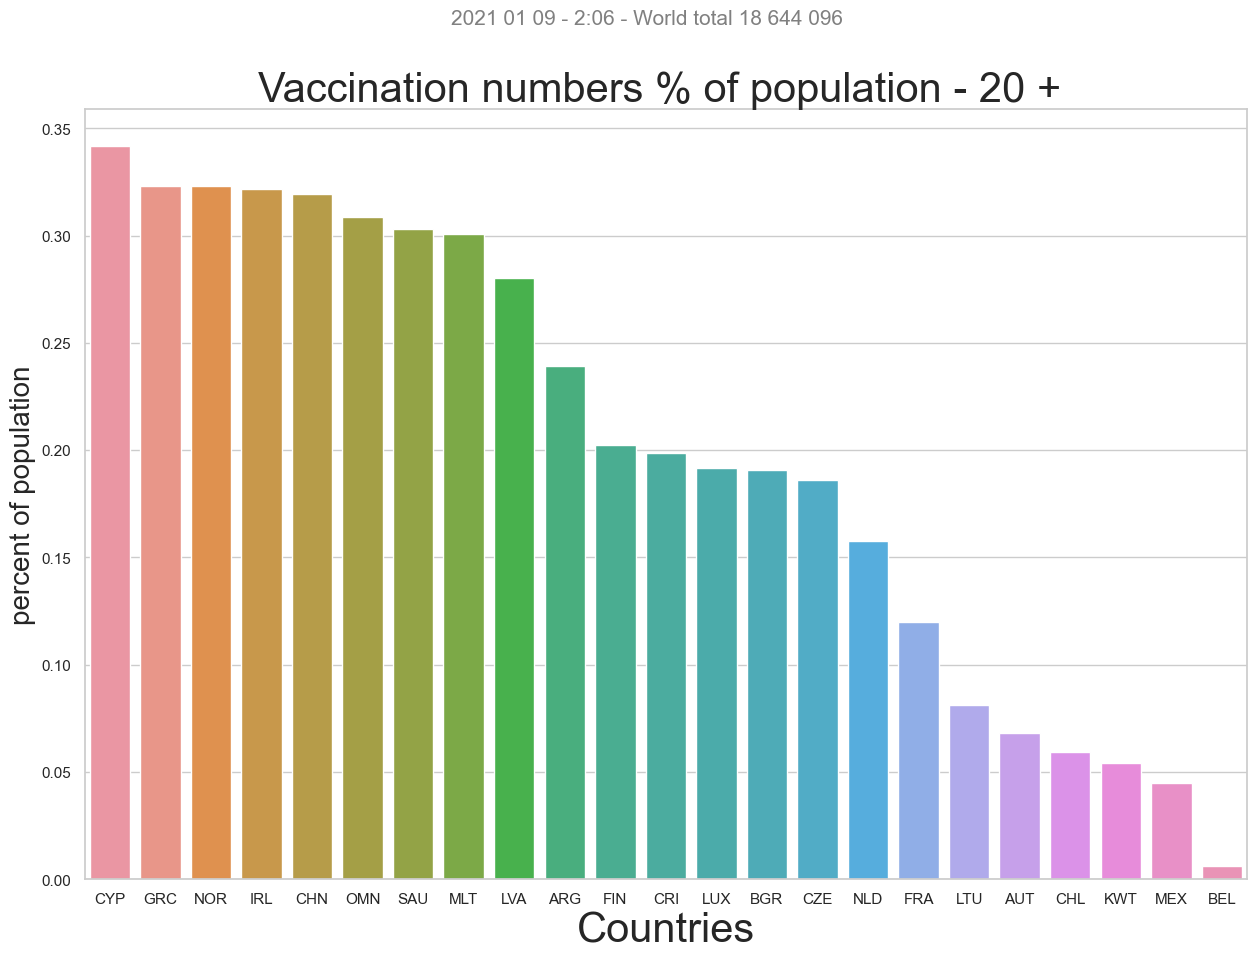

In [34]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[21:]). \
            set_title("Vaccination numbers % of population - 20 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")
plt.show() 

## Scatter plots

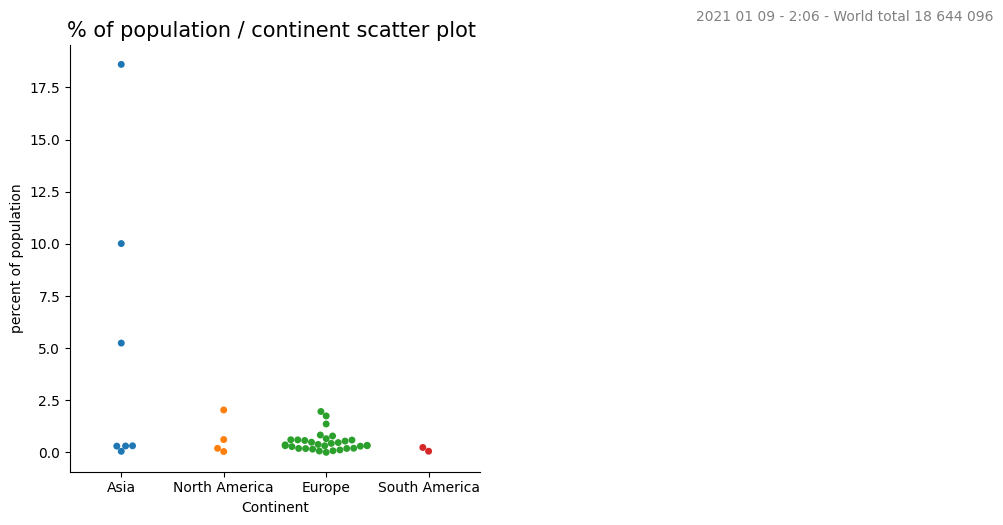

In [35]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% of population / continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

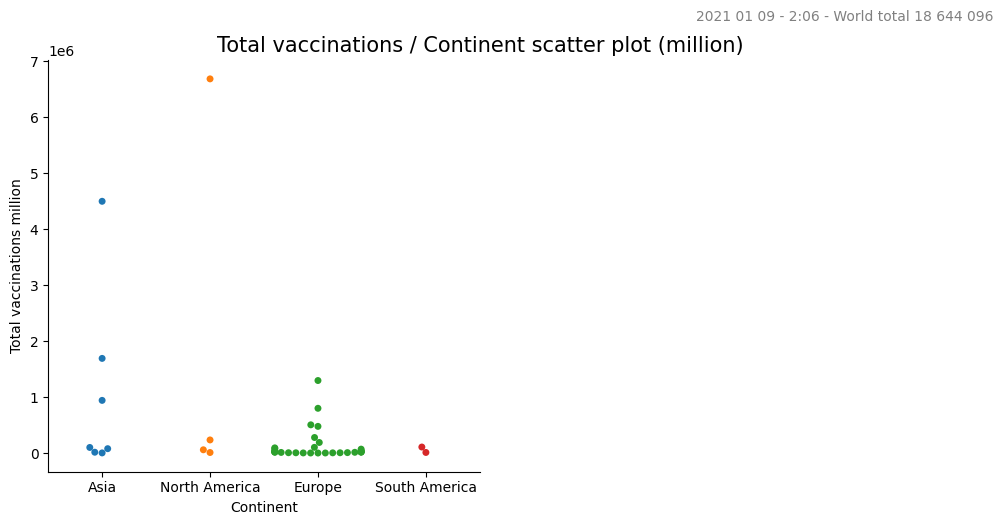

In [36]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="total_vaccinations", data=CountriesData,kind="swarm",legend='brief')
plt.title("Total vaccinations / Continent scatter plot (million)" , fontsize=15, x=1,y=1.1 )
plt.ylabel("Total vaccinations million",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryTotal_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [37]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

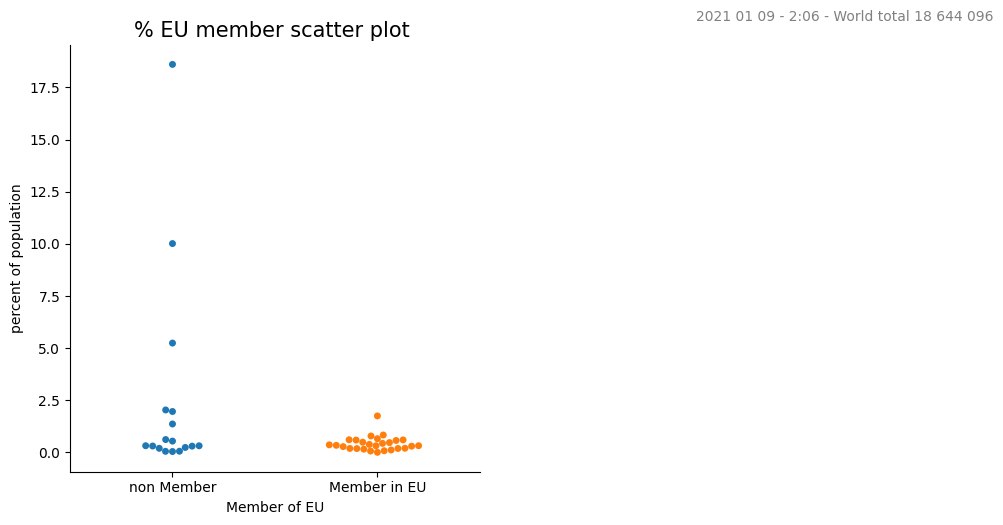

In [38]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")
plt.show() 

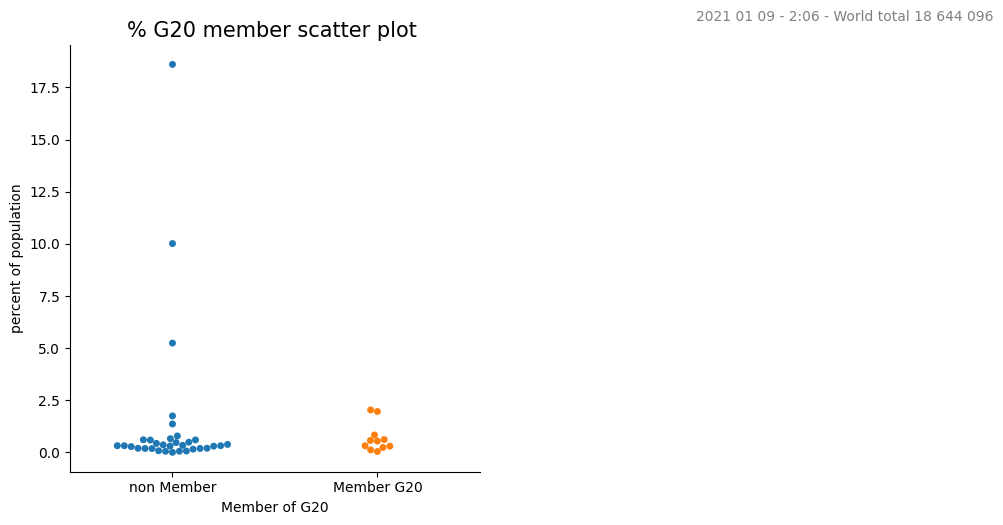

In [39]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

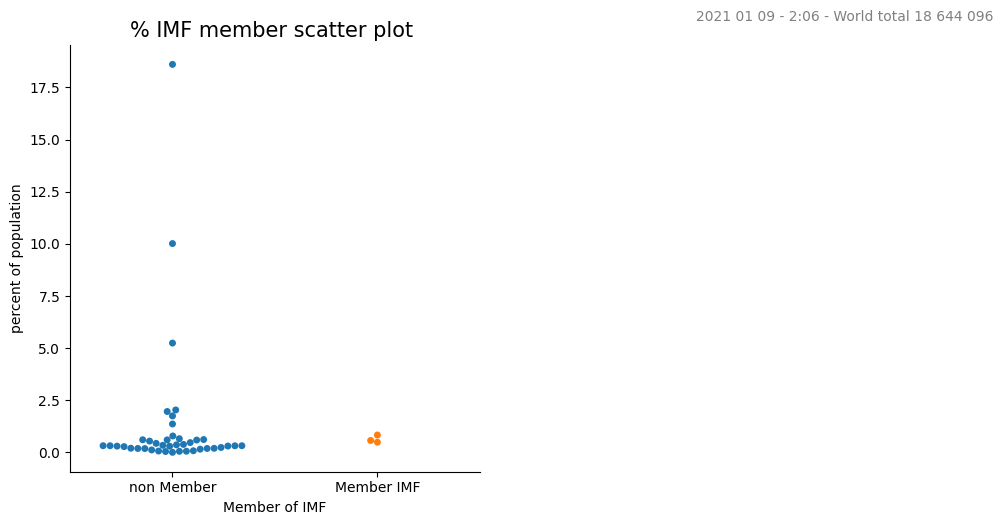

In [40]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [41]:
CountriesDataEurope = CountriesData[CountriesData["continent"] == "Europe"]
europetotal_vaccinations_str = europetotal_vaccinations_str = '{:,}'.format(CountriesDataEurope.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape,europetotal_vaccinations_str)


18 644 096 (44, 3) 4 205 827


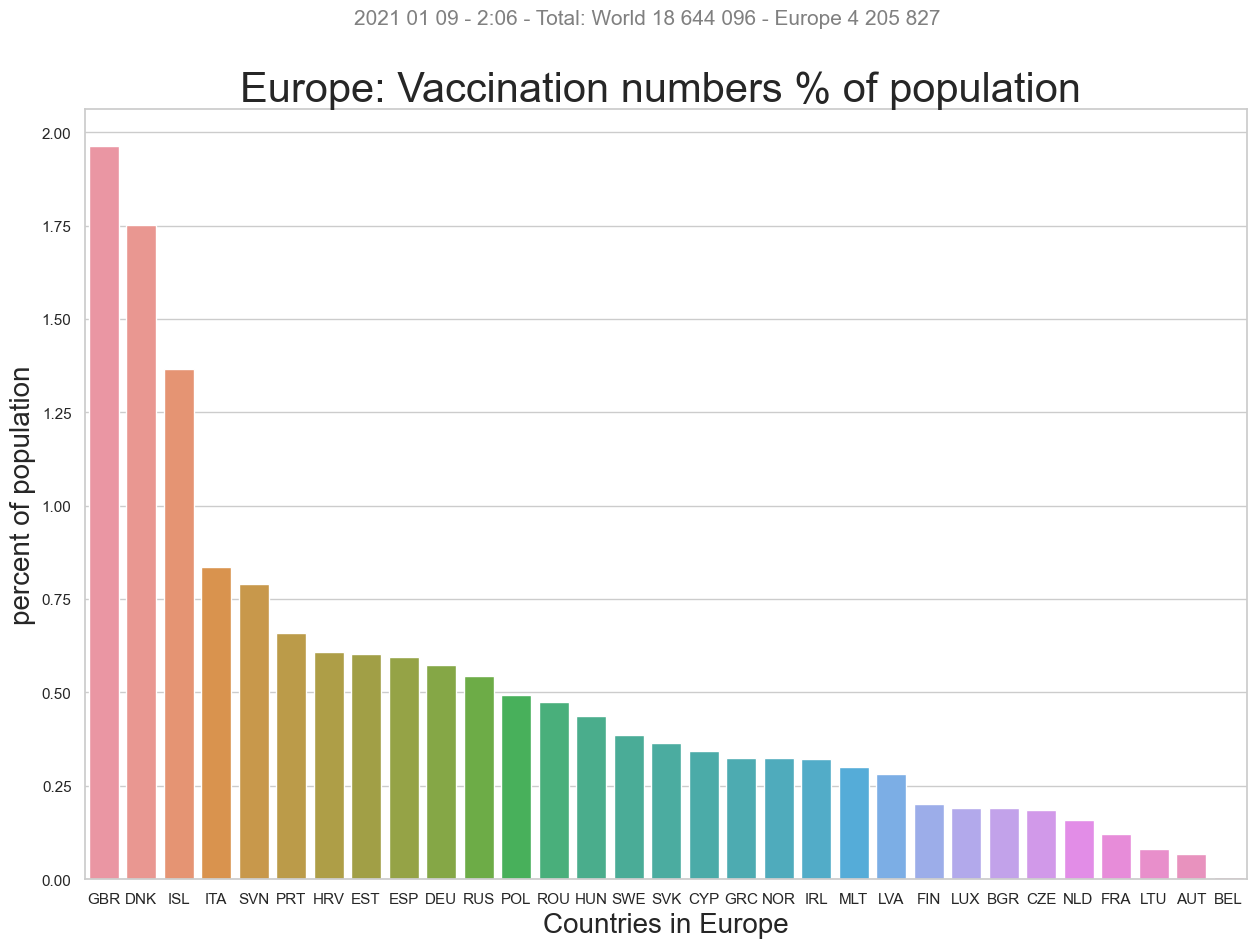

In [42]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesDataEurope). \
            set_title("Europe: Vaccination numbers % of population ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountryPopulation.png",bbox_inches="tight")
plt.show() 

In [43]:
#CountriesDataEurope

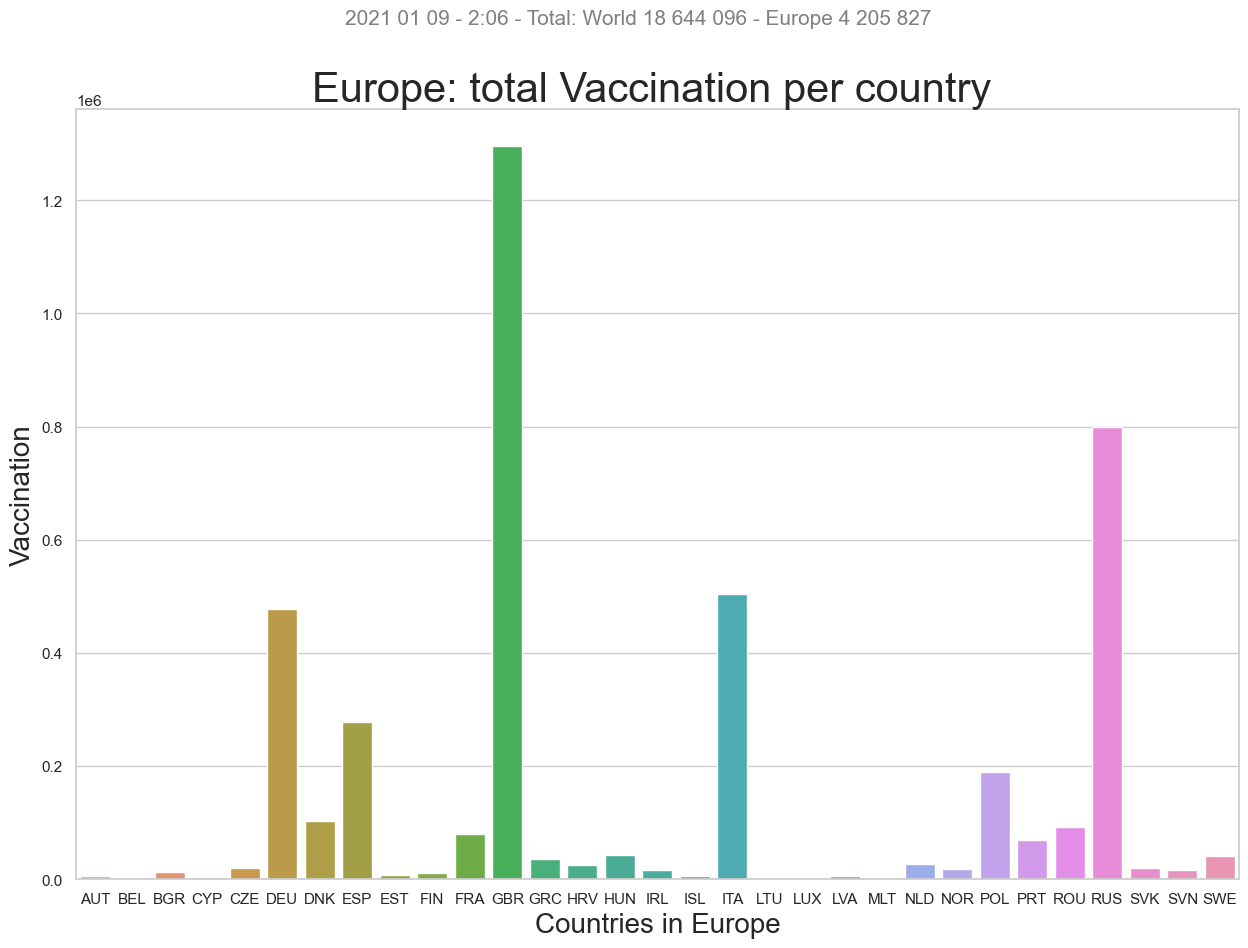

In [44]:
CountriesDataEurope = CountriesDataEurope.sort_values(by=['iso_code'],ascending=True)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEurope). \
            set_title("Europe: total Vaccination per country ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [45]:
#All countries Europe also no reporting
WDpopulationEurope = WDpopulation[WDpopulation["continent"] == "Europe"]
 
#CountriesDataEuropeAll = CountriesDataEurope
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1")  
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1") \
        [{"memberEU_x","country_x","ISO3166_1","total_vaccinations","vaccinations_population_percent","genderH_x"}]

CountriesDataEuropeAll['total_vaccinations'] = CountriesDataEuropeAll['total_vaccinations'].fillna(0)
CountriesDataEuropeAll['vaccinations_population_percent'] = CountriesDataEuropeAll['vaccinations_population_percent'].fillna(0)
CountriesDataEuropeAll = CountriesDataEuropeAll.sort_values(by=['ISO3166_1'],ascending=True)
#CountriesDataEuropeAll["Member EU"] = CountriesDataEuropeAll["Member EU"].fillna("non Member")
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll.rename(columns = {'memberEU_x': 'memberEU'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'genderH_x': 'head_gender'}, inplace = True)
# name change 
CountriesDataEuropeAll
#CountriesDataEurope
#WDpopulationEurope 
#CountriesDataEurope

,memberEU,vaccinations_population_percent,total_vaccinations,country_x,ISO3166_1,head_gender
36,non Member,0.000000,0.0,Albania,ALB,male
10,non Member,0.000000,0.0,Andorra,AND,male
25,non Member,0.000000,0.0,Armenia,ARM,male
8,Member in EU,0.068111,6000.0,Austria,AUT,male
29,non Member,0.000000,0.0,Azerbaijan,AZE,male
24,Member in EU,0.006123,700.0,Belgium,BEL,male
22,Member in EU,0.190785,13355.0,Bulgaria,BGR,male
32,non Member,0.000000,0.0,Bosnia and Herzegovina,BIH,male
39,non Member,0.000000,0.0,Belarus,BLR,male
3,non Member,0.000000,0.0,Switzerland,CHE,male


## All countries on continent Europe

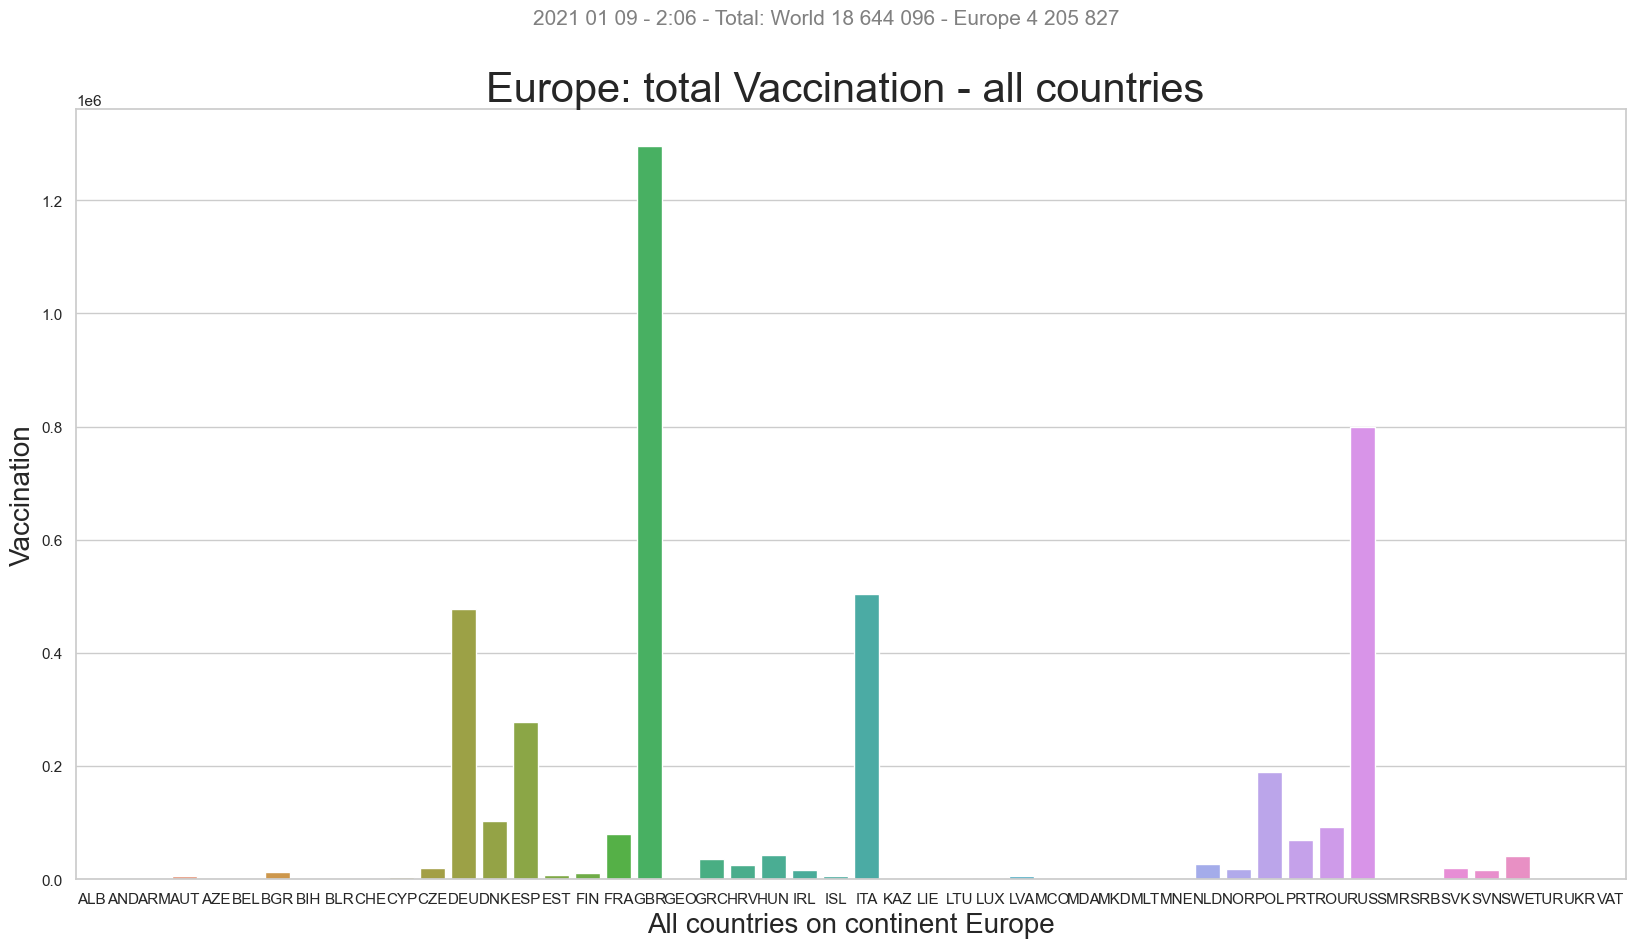

In [46]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEuropeAll). \
            set_title("Europe: total Vaccination - all countries ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All countries on continent Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/Corona_EuropeAllVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [47]:
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 36 to 12
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   memberEU                         50 non-null     object 
 1   vaccinations_population_percent  50 non-null     float64
 2   total_vaccinations               50 non-null     float64
 3   country_x                        50 non-null     object 
 4   ISO3166_1                        50 non-null     object 
 5   head_gender                      50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [48]:
CountriesDataEuropeAll


,memberEU,vaccinations_population_percent,total_vaccinations,country_x,ISO3166_1,head_gender
36,non Member,0.000000,0.0,Albania,ALB,male
10,non Member,0.000000,0.0,Andorra,AND,male
25,non Member,0.000000,0.0,Armenia,ARM,male
8,Member in EU,0.068111,6000.0,Austria,AUT,male
29,non Member,0.000000,0.0,Azerbaijan,AZE,male
24,Member in EU,0.006123,700.0,Belgium,BEL,male
22,Member in EU,0.190785,13355.0,Bulgaria,BGR,male
32,non Member,0.000000,0.0,Bosnia and Herzegovina,BIH,male
39,non Member,0.000000,0.0,Belarus,BLR,male
3,non Member,0.000000,0.0,Switzerland,CHE,male


### Countries in EU

In [49]:
#CountriesDataEuropeEU[CountriesDataEuropeEU["ISO3166_1"] == "RUS"]
#CountriesDataEuropeEU
CountriesDataEuropeAll.rename(columns = {'country_x': 'country'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'ISO3166_1': 'ISO3166-1'}, inplace = True)

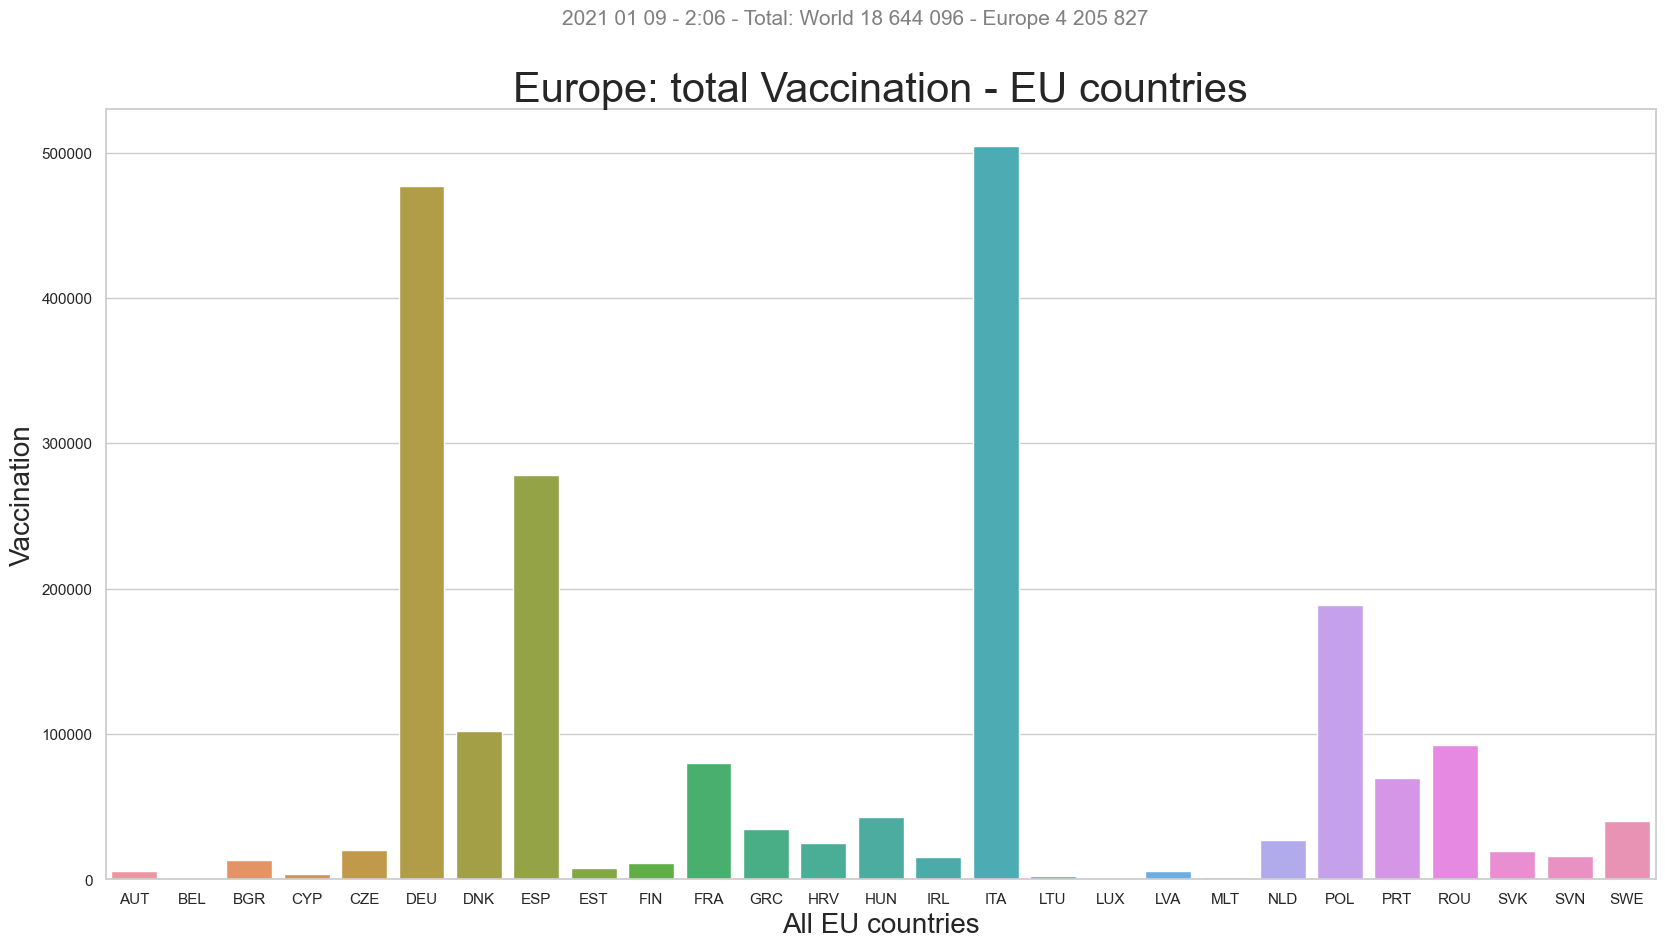

In [50]:
CountriesDataEuropeEU = CountriesDataEuropeAll[CountriesDataEuropeAll["memberEU"] == "Member in EU"]

plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "total_vaccinations", data=CountriesDataEuropeEU). \
            set_title("Europe: total Vaccination - EU countries", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
#plt.annotate('actual group', xy=(x+0.2,y), xytext=(x+0.3, 300),
#             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))
#for p in ax.patches:
#    print(p)

plt.savefig("images/EU_VaccinationperCountry.png",bbox_inches="tight")
plt.show()

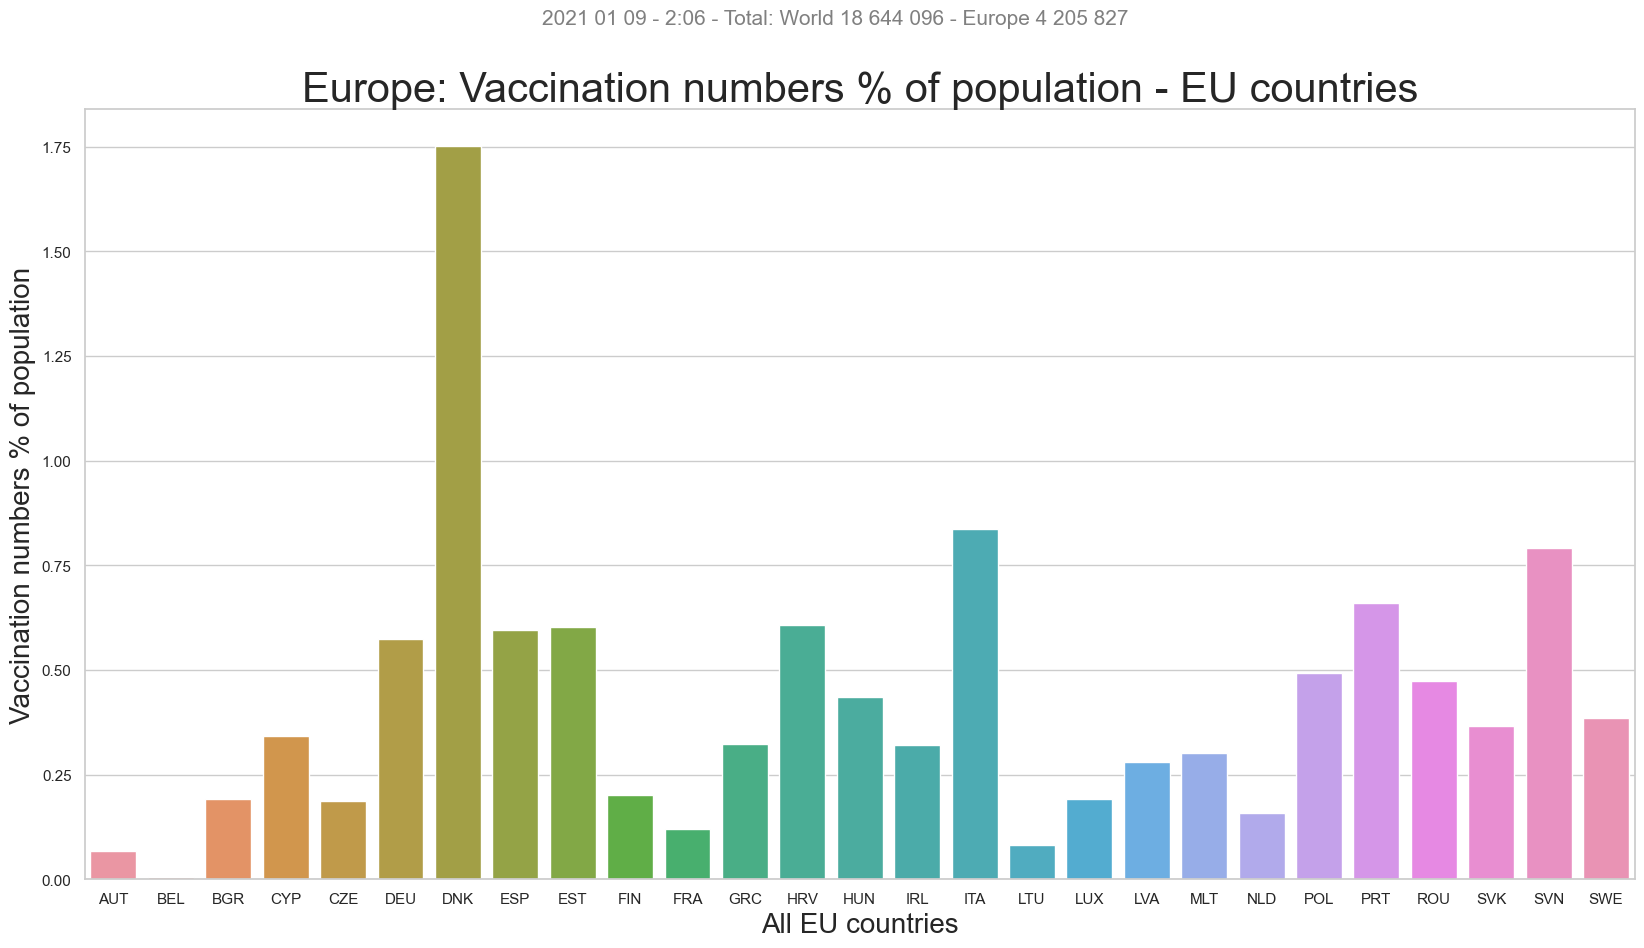

In [51]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "vaccinations_population_percent", data=CountriesDataEuropeEU). \
            set_title("Europe: Vaccination numbers % of population - EU countries", \
                      fontsize=30)
style = dict(size=10, color='gray')

plt.ylabel("Vaccination numbers % of population",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/EU_PercentVaccinationperCountry.png",bbox_inches="tight")
plt.show()

In [52]:
CountriesDataEuropeEU
#WDpopulationEuropeEU

,memberEU,vaccinations_population_percent,total_vaccinations,country,ISO3166-1,head_gender
8,Member in EU,0.068111,6000.0,Austria,AUT,male
24,Member in EU,0.006123,700.0,Belgium,BEL,male
22,Member in EU,0.190785,13355.0,Bulgaria,BGR,male
37,Member in EU,0.341843,3901.0,Cyprus,CYP,male
42,Member in EU,0.186255,19918.0,Czech Republic,CZE,male
31,Member in EU,0.573618,476959.0,Germany,DEU,female
14,Member in EU,1.751912,102092.0,Denmark,DNK,female
0,Member in EU,0.594817,277976.0,Spain,ESP,male
44,Member in EU,0.601818,7973.0,Estonia,EST,male
9,Member in EU,0.202416,11135.0,Finland,FIN,female


### Countries in EU not delivering Vaccination statistics

In [53]:
CountriesDataEuropeAll[(CountriesDataEuropeAll["memberEU"] == "Member in EU") & \
(CountriesDataEuropeAll["total_vaccinations"] == 0 )][{"total_vaccinations","country","ISO3166-1","memberEU"}]

,country,ISO3166-1,total_vaccinations,memberEU


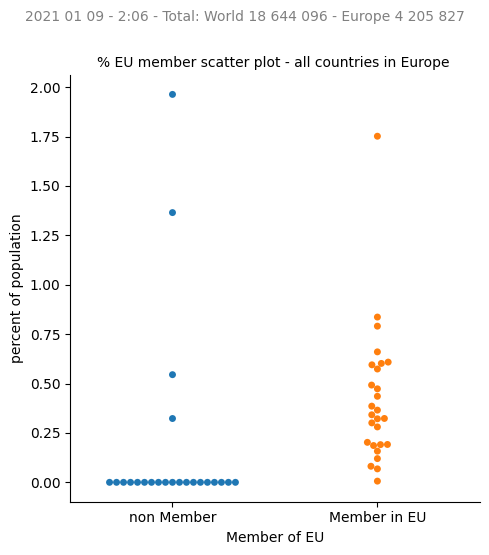

In [54]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="memberEU", y="vaccinations_population_percent", data=CountriesDataEuropeAll,kind="swarm",legend='brief')
plt.title("% EU member scatter plot - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_VaccinationperPopulation_AllEurope_scatterplot.png",bbox_inches="tight")
plt.show() 

In [55]:
#CountriesDataEuropeAll["head_gender"].astype('string')  
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 36 to 12
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   memberEU                         50 non-null     object 
 1   vaccinations_population_percent  50 non-null     float64
 2   total_vaccinations               50 non-null     float64
 3   country                          50 non-null     object 
 4   ISO3166-1                        50 non-null     object 
 5   head_gender                      50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [56]:
#CountriesDataEuropeAll["vaccinations_population_percent].value_counts()

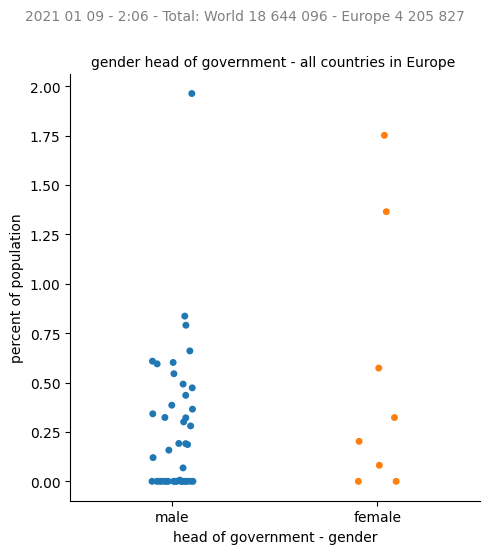

In [57]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="vaccinations_population_percent", data=CountriesDataEuropeAll)
plt.title("gender head of government - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_percent_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

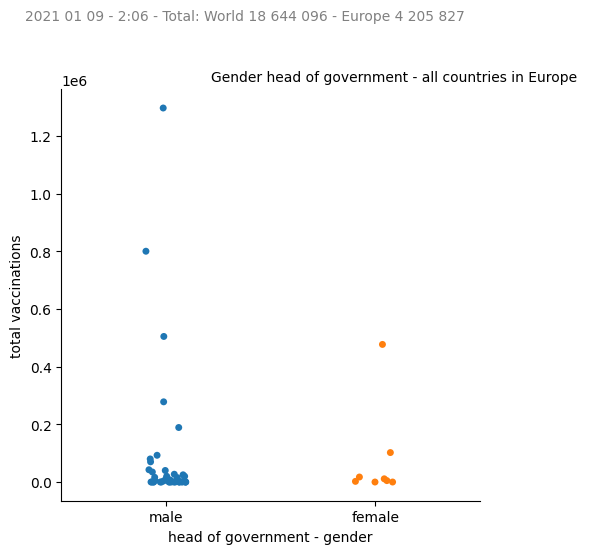

In [58]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="total_vaccinations", data=CountriesDataEuropeAll)
plt.title("Gender head of government - all countries in Europe ",fontsize=10,x=0.8)
plt.ylabel("total vaccinations",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

In [59]:
print(worldtotal_vaccinations_str, plotLatestCountries.shape, europetotal_vaccinations_str, CountriesDataEurope.shape)

18 644 096 (44, 3) 4 205 827 (31, 21)


In [60]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-09 02:06:50.827337
Time elapsed (hh:mm:ss.ms) 0:00:20.977096


In [61]:
#The Global State of Democracy Indices
#stata_democracy_indices = "https://www.idea.int/gsod-indices/sites/default/files/gsodi_pv_4.dta"
#df = pd.read_stata(stata_democracy_indices)